# Health Data versus Day of Week 

### Import data and begin cleaning  

The data was already very clean, as we only took measurements from the last 90 days and there was data for every day, thus the only cleaning required is converting any floats into more workable integers

In [49]:
import pandas as pd
import utils

# import the data and parse into lists
health_df = pd.read_csv("health_data.csv")
steps = health_df["Step Count"]
stairs = health_df["Flights Climbed"]
date = health_df["Date"]

# clean the data
steps = utils.clean_data(steps)
stairs = utils.clean_data(stairs)

# merge the data
days_df = pd.read_csv("days_of_week.csv")
merged_df = health_df.merge(days_df, on="Date")
merged_df.to_csv("merged_day_health.csv")

# split, apply, and combine data
grouped_by_day, mean_steps = utils.split_apply_combine(merged_df, "Step Count")
grouped_by_day, mean_stairs = utils.split_apply_combine(merged_df, "Flights Climbed")

# group mean data by days
steps_by_day = utils.group_days(mean_steps)
stairs_by_day = utils.group_days(mean_stairs)

### Plot the data  
Below we are going to see a visualization of both the steps and flights climbed over the last 90 days,  
as well as the mean steps per day of the week

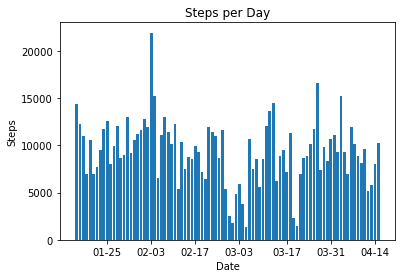

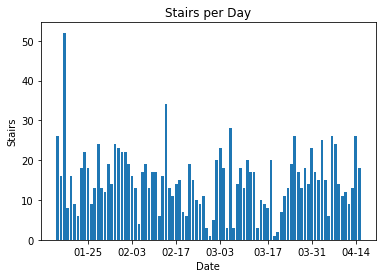

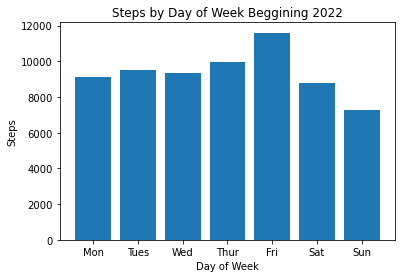

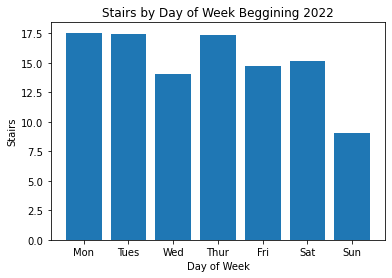

In [50]:
import matplotlib.pyplot as plt

utils.plot_by_day(date, steps, "Steps")
utils.plot_by_day(date, stairs, "Stairs")
utils.plot_by_day_of_week(steps_by_day, "Steps")
utils.plot_by_day_of_week(stairs_by_day, "Stairs")

## Categorizing Data  
Seperate amount of steps and amount flights climbed into two categories: High (many) versus Low (few)

In [51]:
steps_cat = utils.categorize_high_low(steps)
stairs_cat = utils.categorize_high_low(stairs)
merged_df["H/L Steps"] = steps_cat
merged_df["H/L Flights"] = stairs_cat
grouped_by_day, mean_hl_steps = utils.split_apply_combine(merged_df, "H/L Steps")
grouped_by_day, mean_hl_flights = utils.split_apply_combine(merged_df, "H/L Flights")
mean_hl_flights = mean_hl_flights * 90
mean_hl_steps = mean_hl_steps * 90
for i in range(len(mean_hl_steps)):
    mean_hl_steps[i] = int(mean_hl_steps[i])
for i in range(len(mean_hl_flights)):
    mean_hl_flights[i] = int(mean_hl_flights[i])
steps_hl_by_day = utils.group_days(mean_hl_steps)
flights_hl_by_day = utils.group_days(mean_hl_flights)
print(steps_hl_by_day)
print(flights_hl_by_day)

[41.0, 55.0, 37.0, 55.0, 69.0, 34.0, 20.0]
[48.0, 55.0, 30.0, 55.0, 55.0, 27.0, 20.0]


### Hypothesis Testing  
We are going to test whether or not the amount of steps correlates to the amount of flights of stairs climbed in a day

In [52]:
from scipy import stats

# use t-test dependent 
t, pval = stats.ttest_rel(steps_cat, stairs_cat)
pval /= 2 # divide by two because 1 rejection region
print("t:", t, "pval:", pval)
alpha = 0.01
if pval < alpha:
    print("reject H0")
else:
    print("do not reject H0")

# use t-test dependent 
t, pval = stats.ttest_rel(steps_hl_by_day, flights_hl_by_day)
pval /= 2 # divide by two because 1 rejection region
print("t:", t, "pval:", pval)
alpha = 0.01
if pval < alpha:
    print("reject H0")
else:
    print("do not reject H0")


t: 0.7728618480955122 pval: 0.220825938355953
do not reject H0
t: 1.161895003862225 pval: 0.14470161242339505
do not reject H0
